# Programming Workflow Calculating EPR – NRC Chignecto

---

**Lab**: In_coast Lab  
**Author**: C. Hart  
**Date**: 2024-09-12  

Notebook that processes and analyzes data from abmur to calculte end point erosion rate EPR

---

In [ ]:
##### Marsh elevation 5.924

In [1]:
%%capture
# ^Command to not print anything from this cell -- makes notebook less messy sometimes
# Import required modules
import easygui
import pandas as pd
import glob
import os
import sys
import numpy as np
import pyrsktools
from pyrsktools import RSK as RSK
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
from openpyxl import load_workbook
from scipy.fft import fft, ifft
import statsmodels.api as sm
from scipy.signal import welch
import os
import zipfile
import easygui
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
sys.path.append(r'C:\Users\S1495478\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hoboreader')

In [3]:
# Declare paths
shore_pts_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.dbf"
shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.shp"
perp_transects_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\AMBUR_transects\2024-09-11 17_56_15.031009 transects\perp_transects.shp"
perp_transects_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\AMBUR_transects\2024-09-11 17_56_15.031009 transects\perp_transects.dbf"

In [5]:
import geopandas as gpd
from shapely.geometry import LineString, Point
import numpy as np

# Load the shapefile
shapefile_path = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\AMBUR_transects\2024-09-11 17_56_15.031009 transects\perp_transects.shp"
transects_gdf = gpd.read_file(shapefile_path)

# Function to get xy coordinates at a specified distance along the transect
def get_xy_at_distance(transect, distance):
    if not isinstance(transect, LineString):
        raise ValueError("The geometry must be a LineString")
    
    # Get the total length of the transect
    transect_length = transect.length
    
    # Check if the distance is within the length of the transect
    if distance > transect_length:
        raise ValueError(f"Distance {distance} exceeds transect length {transect_length}")

    # Get the point at the specified distance along the transect
    point_at_distance = transect.interpolate(distance)
    return point_at_distance.x, point_at_distance.y

# Specify the distance along each transect (for example, 50 units)

MarshWidth = pd.DataFrame()

for distance in range(0, 400):

    # List to store results
    results = []
    
    # Iterate over each transect in the GeoDataFrame
    for idx, row in transects_gdf.iterrows():
        transect = row['geometry']  # Assuming the geometry column is 'geometry'
        
        try:
            x, y = get_xy_at_distance(transect, distance)
            results.append({'transect_id': idx, 'x': x, 'y': y})
        except ValueError as e:
            print(f"Skipping transect {idx}: {e}")
    
    # Convert the results to a GeoDataFrame for easy export
    results_gdf = gpd.GeoDataFrame(results, geometry=gpd.points_from_xy([r['x'] for r in results], [r['y'] for r in results]))

    MarshWidth['x'+ str(distance)] = results_gdf['x']
    MarshWidth['y'+ str(distance)] = results_gdf['y']

    
    # Save the resulting points to a new shapefile
    # output_shapefile_path = '/mnt/data/transect_points_at_distance.shp'
    # results_gdf.to_file(output_shapefile_path)
    
    # print(f"Results saved to {output_shapefile_path}")

C:\Users\S1495478\AppData\Local\Temp\ipykernel_10080\3471242707.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MarshWidth['x'+ str(distance)] = results_gdf['x']
C:\Users\S1495478\AppData\Local\Temp\ipykernel_10080\3471242707.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MarshWidth['y'+ str(distance)] = results_gdf['y']
C:\Users\S1495478\AppData\Local\Temp\ipykernel_10080\3471242707.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has p

In [7]:
print(results_gdf['x'])

0      397215.734699
1      397217.061729
2      397218.388760
3      397219.715790
4      397220.676339
           ...      
99     398975.413685
100    399016.552797
101    399036.996916
102    399057.441036
103    399059.546148
Name: x, Length: 104, dtype: float64


Shapefile loaded successfully:
Error reading DBF file: 'charmap' codec can't decode byte 0x8d in position 0: character maps to <undefined>
Shapefile loaded successfully:
    Id  Transect  TranSpace  TranDist Location  MaxBNum  BaseOrder  OFFshore  \
0  1.0       1.0       25.0     500.0     None      0.0        1.0       1.0   
1  2.0       2.0       25.0     500.0     None      0.0        1.0       1.0   
2  3.0       3.0       25.0     500.0     None      0.0        1.0       1.0   
3  4.0       4.0       25.0     500.0     None      0.0        1.0       1.0   
4  5.0       5.0       25.0     500.0     None      0.0        1.0       1.0   

   CastDir BASE_LOC         StartX        StartY           EndX          EndY  \
0     -1.0     None  397614.172189  5.080161e+06  397114.877089  5.080134e+06   
1     -1.0     None  397615.499219  5.080136e+06  397116.204119  5.080109e+06   
2     -1.0     None  397616.826249  5.080111e+06  397117.531149  5.080085e+06   
3     -1.0     None  3976

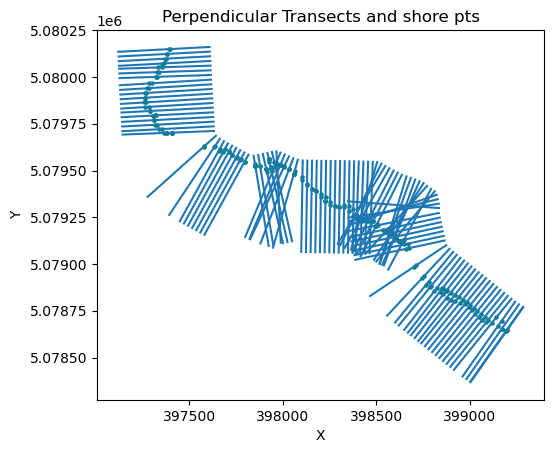

In [11]:
# import files into dataframes and inspect them

# import shore pts files into dataframes and inspect them
import geopandas as gpd
import pandas as pd
from dbfread import DBF

# Paths to the files
# shore_pts_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.dbf"
# # shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.shp"
# shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\AMBUR_capture\2024-09-11 15_33_33.19299 shorepts\shore_pts.shp"
shore_pts_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-18 10_08_08.448052 shorepts\shore_pts.shp"
shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-18 10_08_08.448052 shorepts\shore_pts.dbf"
# Read the shapefile into a GeoDataFrame
try:
    shore_pts_gdf = gpd.read_file(shore_pts_path_shp)
    print("Shapefile loaded successfully:")
    # print(shore_pts_gdf.head())
except Exception as e:
    print(f"Error reading shapefile: {e}")

# Read the .dbf file into a DataFrame
try:
    shore_pts_dbf = pd.DataFrame(iter(DBF(shore_pts_path_dbf)))
    print("DBF file loaded successfully:")
    # print(shore_pts_dbf.head())
except Exception as e:
    print(f"Error reading DBF file: {e}")

# Read the shapefile into a GeoDataFrame
try:
    perp_transects_gdf = gpd.read_file(perp_transects_path_shp)
    print("Shapefile loaded successfully:")
    print(perp_transects_gdf.head())
except Exception as e:
    print(f"Error reading shapefile: {e}")

# Read the DBF file into a DataFrame
try:
    perp_transects_dbf = pd.DataFrame(iter(DBF(perp_transects_path_dbf)))
    print("DBF file loaded successfully:")
    print(perp_transects_dbf.head())
except Exception as e:
    print(f"Error reading DBF file: {e}")

# Plotting the shapefile data
try:
    perp_transects_gdf.plot()
    plt.title('Perpendicular Transects and shore pts')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.scatter(shore_pts_gdf['POINT_X'], shore_pts_gdf['POINT_Y'], c='teal', s=5)
    # plt.colorbar()
    plt.show()

    plt.show()
except Exception as e:
    print(f"Error plotting shapefile: {e}")



In [108]:
import numpy as np
from shapely.geometry import Point

# buffered_transects_gdf = perp_transects_gdf.copy()
# buffered_transects_gdf['geometry'] = buffered_transects_gdf.geometry.buffer(0.01)  # Buffer by 1 cm to avoid rounding errors

# transects = 0
# distances = 0

# # Function to calculate Euclidean distance between two points using Pythagoras theorem
# def calculate_distance(point1, point2):
#     delta_x = point2.x - point1.x
#     delta_y = point2.y - point1.y
#     distance = np.sqrt(delta_x**2 + delta_y**2)
#     # distance = delta_x + delta_y
#     # print(delta_y)
#     if delta_y<0: distance=distance*-1
#     return distance

# # Function to count points on each transect and calculate distance if exactly 2 points are found
# def process_transect(transect, shore_pts_gdf):
#     # Filter points that intersect the transect
#     points_on_transect = shore_pts_gdf[shore_pts_gdf.geometry.intersects(transect.geometry)]
    
#     if len(points_on_transect) == 2:
#         point1 = points_on_transect.geometry.iloc[0]
#         point2 = points_on_transect.geometry.iloc[1]
#         distance = calculate_distance(point1, point2)
#         if distance > 20:
#             print(f"Transect {transect.name}: Distance between two points = {distance:.2f} units")
#             return distance
#         else:
#             return 20
#     else:
#         print(f"Transect {transect.name}: {len(points_on_transect)} points found")
#         return 0   


# # Iterate through each transect and check for exactly two points
# for i, transect in buffered_transects_gdf.iterrows():
#     distances = distances + process_transect(transect, shore_pts_gdf)
#     result = process_transect(transect, shore_pts_gdf)
#     if isinstance(result, (int, float)):
#         transects = transects + 1    

if i==0: points=[((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (shore_pts_gdf['POINT_X'][(i+0)*2], shore_pts_gdf['POINT_Y'][(i+0)*2]), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), ((shore_pts_gdf['POINT_X'][(i+1)*2], shore_pts_gdf['POINT_Y'][(i+1)*2]))]  # Replace with your actual points


print(f"EPR = {distances/transects/4} over {transects} transects")

Transect 14: 4 points found
Transect 14: 4 points found
Transect 18: 6 points found
Transect 18: 6 points found
Transect 28: 6 points found
Transect 28: 6 points found
Transect 30: 4 points found
Transect 30: 4 points found
Transect 31: 8 points found
Transect 31: 8 points found
Transect 38: 4 points found
Transect 38: 4 points found
Transect 43: Distance between two points = 20.71 units
Transect 43: Distance between two points = 20.71 units
Transect 44: 4 points found
Transect 44: 4 points found
Transect 49: Distance between two points = 26.29 units
Transect 49: Distance between two points = 26.29 units
Transect 50: Distance between two points = 36.10 units
Transect 50: Distance between two points = 36.10 units
Transect 63: 4 points found
Transect 63: 4 points found
Transect 70: 10 points found
Transect 70: 10 points found
Transect 73: 0 points found
Transect 73: 0 points found
Transect 74: 4 points found
Transect 74: 4 points found
Transect 75: Distance between two points = 28.97 uni

C:\Users\S1495478\AppData\Local\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


AttributeError: The CRS attribute of a GeoDataFrame without an active geometry column is not defined. Use GeoDataFrame.set_geometry to set the active geometry column.

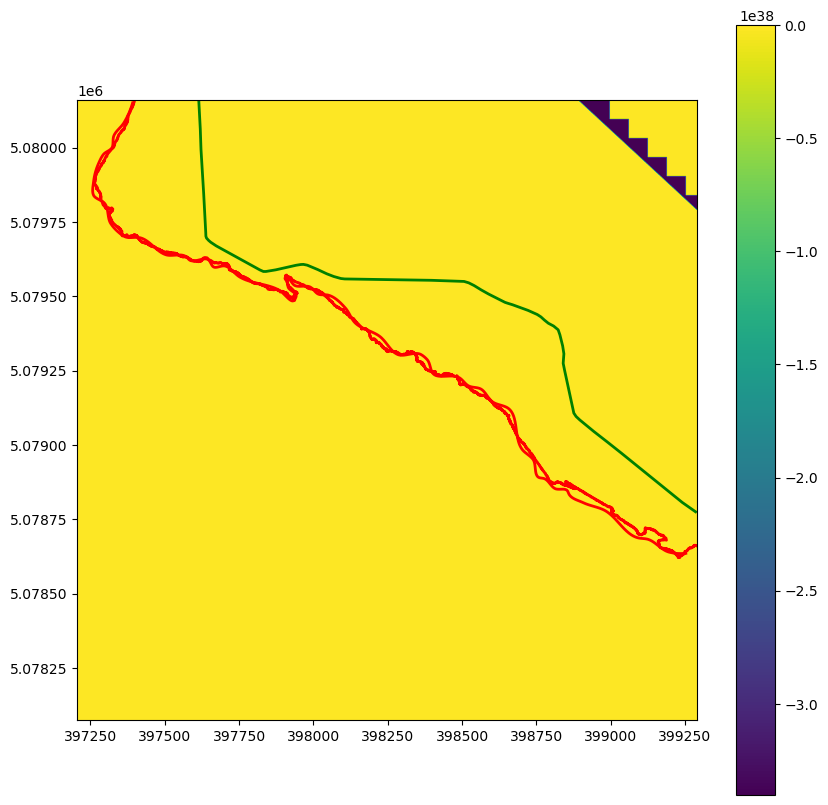

In [19]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Function to display raster and overlay polylines and transects
def display_raster_with_polylines(raster_path, polyline_path1, polyline_path2, perp_transects_gdf):
    # Open and display the raster file
    with rasterio.open(raster_path) as dataset:
        raster_data = dataset.read(1)

        # Plot the raster using imshow
        fig, ax = plt.subplots(figsize=(10, 10))

        raster_mean = np.nanmean(raster_data)
        raster_data = np.where(np.isnan(raster_data), raster_mean, raster_data)

        img = ax.imshow(raster_data, cmap='viridis', extent=(dataset.bounds.left, dataset.bounds.right, dataset.bounds.bottom, dataset.bounds.top))

        # Add a colorbar
        plt.colorbar(img, ax=ax)

        # Import and plot the first polyline (dyke)
        polyline1 = gpd.read_file(polyline_path1)
        polyline1.plot(ax=ax, edgecolor='green', linewidth=2, label='Dyke')  # Adjust color and line width as needed

        # Import and plot the second polyline (shoreline)
        polyline2 = gpd.read_file(polyline_path2)
        polyline2.plot(ax=ax, edgecolor='red', linewidth=2, label='Shoreline')  # Adjust color and line width as needed

        # Plot the transects
        perp_transects_gdf.plot(ax=ax, edgecolor='blue', linewidth=1, linestyle='--', label='Transects')  # Adjust style and color as needed

        # Set x and y axis limits based on raster bounds or manually
        plt.xlim(dataset.bounds.left, dataset.bounds.right)  # Modify as needed for custom limits
        plt.ylim(dataset.bounds.bottom, dataset.bounds.top)  # Modify as needed for custom limits

        # Set plot labels and legend
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

        # Display the plot
        plt.show()

# File paths
raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\ambur_Contour_Merge_trace2.shp"
dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"

# Example GeoDataFrame for transects (replace this with actual data)
# perp_transects_gdf = gpd.read_file("path_to_your_transects.shp")
# For example:
perp_transects_gdf = gpd.GeoDataFrame()  # Replace with your actual transects GeoDataFrame

# Display the raster with polylines and transects
display_raster_with_polylines(raster_path, dyke_path_shp, shoreline_path_shp, perp_transects_gdf)

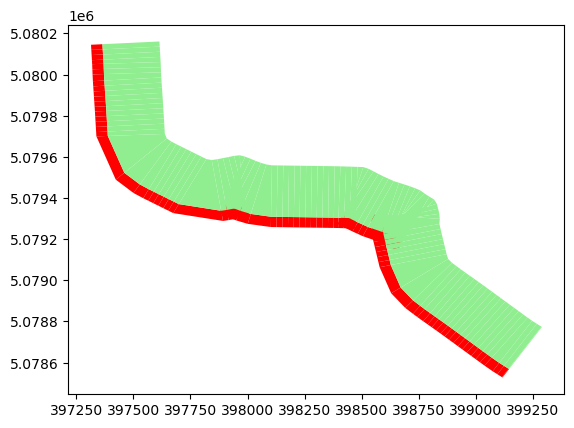

In [38]:

# Initialize lists to store all x and y coordinates for the single polygon
x_coords = []
y_coords = []

dis1 = 0
dis2 = 250
dis3 = 300


# Loop through the DataFrame and collect the x and y coordinates
for i in range(0,len(MarshWidth)-1):

    xc = []
    yc = []

    xe = []
    ye = []
    
    xc.append(MarshWidth['x'+ str(dis1)][i])
    xc.append(MarshWidth['x'+ str(dis1)][i+1])
    xc.append(MarshWidth['x'+ str(dis2)][i+1])
    xc.append(MarshWidth['x'+ str(dis2)][i])
    
    yc.append(MarshWidth['y'+ str(dis1)][i])
    yc.append(MarshWidth['y'+ str(dis1)][i+1])
    yc.append(MarshWidth['y'+ str(dis2)][i+1])
    yc.append(MarshWidth['y'+ str(dis2)][i])

    xe.append(MarshWidth['x'+ str(dis2)][i])
    xe.append(MarshWidth['x'+ str(dis2)][i+1])
    xe.append(MarshWidth['x'+ str(dis3)][i+1])
    xe.append(MarshWidth['x'+ str(dis3)][i])
    
    ye.append(MarshWidth['y'+ str(dis2)][i])
    ye.append(MarshWidth['y'+ str(dis2)][i+1])
    ye.append(MarshWidth['y'+ str(dis3)][i+1])
    ye.append(MarshWidth['y'+ str(dis3)][i])
    
    plt.fill(xe, ye, color="red", alpha=1, edgecolor='none')
    
for i in range(0,len(MarshWidth)-1):
    xc = []
    yc = []

    xe = []
    ye = []
    
    xc.append(MarshWidth['x'+ str(dis1)][i])
    xc.append(MarshWidth['x'+ str(dis1)][i+1])
    xc.append(MarshWidth['x'+ str(dis2)][i+1])
    xc.append(MarshWidth['x'+ str(dis2)][i])
    
    yc.append(MarshWidth['y'+ str(dis1)][i])
    yc.append(MarshWidth['y'+ str(dis1)][i+1])
    yc.append(MarshWidth['y'+ str(dis2)][i+1])
    yc.append(MarshWidth['y'+ str(dis2)][i])

    xe.append(MarshWidth['x'+ str(dis2)][i])
    xe.append(MarshWidth['x'+ str(dis2)][i+1])
    xe.append(MarshWidth['x'+ str(dis3)][i+1])
    xe.append(MarshWidth['x'+ str(dis3)][i])
    
    ye.append(MarshWidth['y'+ str(dis2)][i])
    ye.append(MarshWidth['y'+ str(dis2)][i+1])
    ye.append(MarshWidth['y'+ str(dis3)][i+1])
    ye.append(MarshWidth['y'+ str(dis3)][i])
    plt.fill(xc, yc, color="lightgreen", alpha=1, edgecolor='none')


# # Close the polygon by connecting the last point back to the first point
# x_coords.append(MarshWidth['x0'][0])
# y_coords.append(MarshWidth['y0'][0])

# # Plot the single polygon with many vertices
# # plt.plot(x_coords, y_coords, marker='o')

# # plt.xlabel('X Coordinates')
# # plt.ylabel('Y Coordinates')
# # plt.title('Single Polygon with Multiple Vertices')
# # plt.show()

# # Plot the polygon enclosing the points
# if len(x_coords) > 0:
#     # Create a list of Shapely Point objects from the coordinates
#     points = MultiPoint([(x, y) for x, y in zip(x_coords, y_coords)])
    
#     # Get the convex hull (polygon) of the points
#     if points.convex_hull.geom_type == 'Polygon':
#         hull = points.convex_hull
#     else:
#         print("Not enough points to form a polygon")
#         hull = None
    
#     if hull:
#         # Extract the coordinates of the convex hull polygon
#         hull_coords = np.array(hull.exterior.coords)
        
#         # Plot the points and the convex hull polygon
#         plt.figure(figsize=(10, 8))
#         plt.plot(x_coords, y_coords, 'o', markersize=5, label="Points")
#         plt.plot(hull_coords[:, 0], hull_coords[:, 1], color='blue', label="Polygon Hull")
#         plt.fill(hull_coords[:, 0], hull_coords[:, 1], color='lightblue', alpha=0.5)
        
#         plt.xlabel('X coordinate')
#         plt.ylabel('Y coordinate')
#         plt.title('Polygon Enclosing Points on Transects with Exactly 2 Points')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

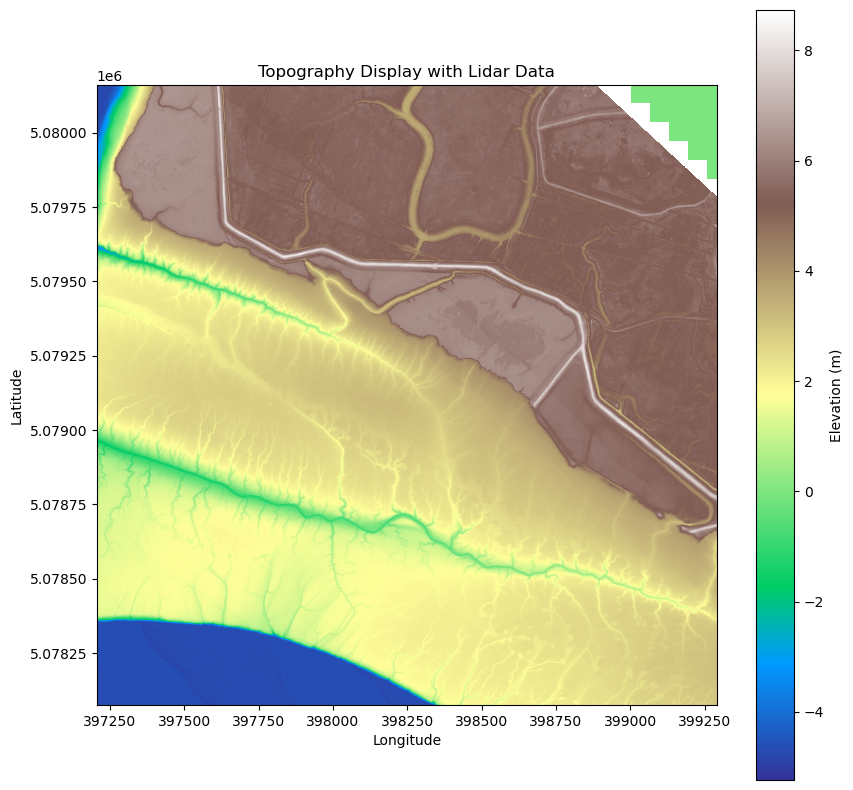

In [23]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your file
file_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the data from the first band
    data = src.read(1)
    
    # Masking out invalid data values, assuming values like np.nan or very high/low numbers indicate no data
    data = np.ma.masked_where(data <= -1e10, data)  # You can change the threshold based on your data
    
    # Calculate the extent manually
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    
    # Plot the data
    plt.figure(figsize=(3.5, 3.5))
    plt.imshow(data, cmap='terrain', extent=extent)
    plt.colorbar(label='Elevation (m)')

    
    # Import and plot the first polyline (dyke)
    # polyline1 = gpd.read_file(dyke_path_shp)
    # polyline1.plot(ax=ax, edgecolor='green', linewidth=12, label='Dyke')  # Adjust color and line width as needed

    # # Import and plot the second polyline (shoreline)
    # polyline2 = gpd.read_file(dyke_path_shp)
    # polyline2.plot(ax=ax, edgecolor='red', linewidth=2, label='Shoreline')  # Adjust color and line width as needed

    
    # Adding axis labels (adjust based on the coordinate system of your data)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Topography Display with Lidar Data')

            
    # Set x and y axis limits based on raster bounds or manually
    plt.xlim(src.bounds.left, src.bounds.right)  # Modify as needed for custom limits
    plt.ylim(src.bounds.bottom + 400, src.bounds.top)  # Modify as needed for custom limits

    
    plt.legend()

    output_path = r"\\sparc7\dvp\archive\Projects\NRC-Chignecto\AGRG_LiDAR\Imagery_" +  + ".jpeg"
    plt.savefig(output_path, dpi=300)  # Save as PNG with 300 DPI
    plt.close()
            
    
    plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001B55281B600> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

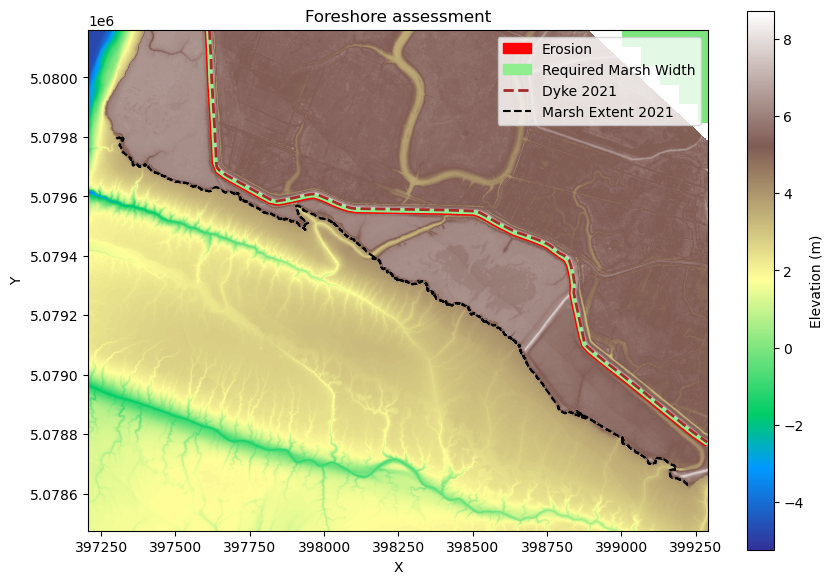

In [21]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Path to your files
file_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\Contour_20210801.shp"
dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"

for j in range(9, 50):
    for k in range(1, 101):

        dis1 = 0
        dis2 = j
        dis3 = j+k
        
        # Open the GeoTIFF file
        with rasterio.open(file_path) as src:
            # Read the data from the first band
            data = src.read(1)
            
            # Masking out invalid data values, assuming values like np.nan or very high/low numbers indicate no data
            data = np.ma.masked_where(data <= -1e10, data)  # You can change the threshold based on your data
            
            # Calculate the extent manually
            extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
            
            # Create the figure and axis
            fig, ax = plt.subplots(figsize=(10, 10))
            
            # Plot the raster data
            raster_image = ax.imshow(data, cmap='terrain', extent=extent)
            plt.colorbar(raster_image, ax=ax, label='Elevation (m)', shrink=0.7)
            
            # Loop through the DataFrame and collect the x and y coordinates
            for i in range(0,len(MarshWidth)-1):
            
                xc = []
                yc = []
            
                xe = []
                ye = []
                
                xc.append(MarshWidth['x'+ str(dis1)][i])
                xc.append(MarshWidth['x'+ str(dis1)][i+1])
                xc.append(MarshWidth['x'+ str(dis2)][i+1])
                xc.append(MarshWidth['x'+ str(dis2)][i])
                
                yc.append(MarshWidth['y'+ str(dis1)][i])
                yc.append(MarshWidth['y'+ str(dis1)][i+1])
                yc.append(MarshWidth['y'+ str(dis2)][i+1])
                yc.append(MarshWidth['y'+ str(dis2)][i])
            
                xe.append(MarshWidth['x'+ str(dis2)][i])
                xe.append(MarshWidth['x'+ str(dis2)][i+1])
                xe.append(MarshWidth['x'+ str(dis3)][i+1])
                xe.append(MarshWidth['x'+ str(dis3)][i])
                
                ye.append(MarshWidth['y'+ str(dis2)][i])
                ye.append(MarshWidth['y'+ str(dis2)][i+1])
                ye.append(MarshWidth['y'+ str(dis3)][i+1])
                ye.append(MarshWidth['y'+ str(dis3)][i])
                
                plt.fill(xe, ye, color="red", alpha=1, edgecolor='red')
                if i == len(MarshWidth)-2: plt.fill(xe, ye, color="red", alpha=1, edgecolor='red', label='Erosion')
                
            for i in range(0,len(MarshWidth)-1):
                xc = []
                yc = []
            
                xe = []
                ye = []
                
                xc.append(MarshWidth['x'+ str(dis1)][i])
                xc.append(MarshWidth['x'+ str(dis1)][i+1])
                xc.append(MarshWidth['x'+ str(dis2)][i+1])
                xc.append(MarshWidth['x'+ str(dis2)][i])
                
                yc.append(MarshWidth['y'+ str(dis1)][i])
                yc.append(MarshWidth['y'+ str(dis1)][i+1])
                yc.append(MarshWidth['y'+ str(dis2)][i+1])
                yc.append(MarshWidth['y'+ str(dis2)][i])
            
                xe.append(MarshWidth['x'+ str(dis2)][i])
                xe.append(MarshWidth['x'+ str(dis2)][i+1])
                xe.append(MarshWidth['x'+ str(dis3)][i+1])
                xe.append(MarshWidth['x'+ str(dis3)][i])
                
                ye.append(MarshWidth['y'+ str(dis2)][i])
                ye.append(MarshWidth['y'+ str(dis2)][i+1])
                ye.append(MarshWidth['y'+ str(dis3)][i+1])
                ye.append(MarshWidth['y'+ str(dis3)][i])
                plt.fill(xc, yc, color="lightgreen", alpha=1, edgecolor='lightgreen')
                if i == len(MarshWidth)-2: plt.fill(xc, yc, color="lightgreen", alpha=1, edgecolor='lightgreen', label='Required Marsh Width')
              
            
            # Import and plot the first polyline (dyke)
            polyline1 = gpd.read_file(dyke_path_shp)
            polyline1.plot(ax=ax, edgecolor='brown', linewidth=2, label='Dyke 2021', linestyle='--')  # Adjust color and line width as needed
        
            # Import and plot the second polyline (shoreline 2021)
            polyline1 = gpd.read_file(shoreline_path_shp)
            polyline1.plot(ax=ax, edgecolor='black', linewidth=1.5, label='Marsh Extent 2021', linestyle='--')  # Adjust color and line width as needed
            
            # Adding axis labels (adjust based on the coordinate system of your data)
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_title('Foreshore assessment')
        
            # Set x and y axis limits based on raster bounds or manually
            plt.xlim(src.bounds.left, src.bounds.right)  # Modify as needed for custom limits
            plt.ylim(src.bounds.bottom + 400, src.bounds.top)  # Modify as needed for custom limits
        
            
            plt.legend()

            output_path = r"C:\Users\S1495478\Documents\RBR\NRC\HTML\Images\example_" + str(j)  + "_" + str(k)  + ".jpeg"
            plt.savefig(output_path, dpi=300)  # Save as PNG with 300 DPI
            plt.close()
            
            # plt.show()

### Quantify Marsh platform heights for the transects.

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

# Path to your files
file_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"
shoreline_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\Contour_20210801.shp"
dyke_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\DYKE2.shp"

dis1 = 0
dis2 = j
dis3 = j+k

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the data from the first band
    data = src.read(1)
    
    # Masking out invalid data values, assuming values like np.nan or very high/low numbers indicate no data
    data = np.ma.masked_where(data <= -1e10, data)  # You can change the threshold based on your data
    
    # Calculate the extent manually
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)
    
    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot the raster data
    raster_image = ax.imshow(data, cmap='terrain', extent=extent)
    plt.colorbar(raster_image, ax=ax, label='Elevation (m)', shrink=0.7)
    
    # Loop through the DataFrame and collect the x and y coordinates
    for i in range(0,len(MarshWidth)-1):
    
        xc = []
        yc = []
    
        xe = []
        ye = []
        
        xc.append(MarshWidth['x'+ str(dis1)][i])
        xc.append(MarshWidth['x'+ str(dis1)][i+1])
        xc.append(MarshWidth['x'+ str(dis2)][i+1])
        xc.append(MarshWidth['x'+ str(dis2)][i])
        
        yc.append(MarshWidth['y'+ str(dis1)][i])
        yc.append(MarshWidth['y'+ str(dis1)][i+1])
        yc.append(MarshWidth['y'+ str(dis2)][i+1])
        yc.append(MarshWidth['y'+ str(dis2)][i])
    
        xe.append(MarshWidth['x'+ str(dis2)][i])
        xe.append(MarshWidth['x'+ str(dis2)][i+1])
        xe.append(MarshWidth['x'+ str(dis3)][i+1])
        xe.append(MarshWidth['x'+ str(dis3)][i])
        
        ye.append(MarshWidth['y'+ str(dis2)][i])
        ye.append(MarshWidth['y'+ str(dis2)][i+1])
        ye.append(MarshWidth['y'+ str(dis3)][i+1])
        ye.append(MarshWidth['y'+ str(dis3)][i])
        
        plt.fill(xe, ye, color="red", alpha=1, edgecolor='red')
        if i == len(MarshWidth)-2: plt.fill(xe, ye, color="red", alpha=1, edgecolor='red', label='Erosion')
        
    for i in range(0,len(MarshWidth)-1):
        xc = []
        yc = []
    
        xe = []
        ye = []
        
        xc.append(MarshWidth['x'+ str(dis1)][i])
        xc.append(MarshWidth['x'+ str(dis1)][i+1])
        xc.append(MarshWidth['x'+ str(dis2)][i+1])
        xc.append(MarshWidth['x'+ str(dis2)][i])
        
        yc.append(MarshWidth['y'+ str(dis1)][i])
        yc.append(MarshWidth['y'+ str(dis1)][i+1])
        yc.append(MarshWidth['y'+ str(dis2)][i+1])
        yc.append(MarshWidth['y'+ str(dis2)][i])
    
        xe.append(MarshWidth['x'+ str(dis2)][i])
        xe.append(MarshWidth['x'+ str(dis2)][i+1])
        xe.append(MarshWidth['x'+ str(dis3)][i+1])
        xe.append(MarshWidth['x'+ str(dis3)][i])
        
        ye.append(MarshWidth['y'+ str(dis2)][i])
        ye.append(MarshWidth['y'+ str(dis2)][i+1])
        ye.append(MarshWidth['y'+ str(dis3)][i+1])
        ye.append(MarshWidth['y'+ str(dis3)][i])
        plt.fill(xc, yc, color="lightgreen", alpha=1, edgecolor='lightgreen')
        if i == len(MarshWidth)-2: plt.fill(xc, yc, color="lightgreen", alpha=1, edgecolor='lightgreen', label='Required Marsh Width')
      
    
    # Import and plot the first polyline (dyke)
    polyline1 = gpd.read_file(dyke_path_shp)
    polyline1.plot(ax=ax, edgecolor='brown', linewidth=2, label='Dyke 2021', linestyle='--')  # Adjust color and line width as needed

    # Import and plot the second polyline (shoreline 2021)
    polyline1 = gpd.read_file(shoreline_path_shp)
    polyline1.plot(ax=ax, edgecolor='black', linewidth=1.5, label='Marsh Extent 2021', linestyle='--')  # Adjust color and line width as needed
    
    # Adding axis labels (adjust based on the coordinate system of your data)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Foreshore assessment')

    # Set x and y axis limits based on raster bounds or manually
    plt.xlim(src.bounds.left, src.bounds.right)  # Modify as needed for custom limits
    plt.ylim(src.bounds.bottom + 400, src.bounds.top)  # Modify as needed for custom limits

    
    plt.legend()
    
    # plt.show()

Shapefile loaded successfully:
Error reading DBF file: 'charmap' codec can't decode byte 0x8d in position 0: character maps to <undefined>
Shapefile loaded successfully:
    Id  Transect  TranSpace  TranDist Location  MaxBNum  BaseOrder  OFFshore  \
0  1.0       1.0       25.0     500.0     None      0.0        1.0       1.0   
1  2.0       2.0       25.0     500.0     None      0.0        1.0       1.0   
2  3.0       3.0       25.0     500.0     None      0.0        1.0       1.0   
3  4.0       4.0       25.0     500.0     None      0.0        1.0       1.0   
4  5.0       5.0       25.0     500.0     None      0.0        1.0       1.0   

   CastDir BASE_LOC         StartX        StartY           EndX          EndY  \
0     -1.0     None  397614.172189  5.080161e+06  397114.877089  5.080134e+06   
1     -1.0     None  397615.499219  5.080136e+06  397116.204119  5.080109e+06   
2     -1.0     None  397616.826249  5.080111e+06  397117.531149  5.080085e+06   
3     -1.0     None  3976

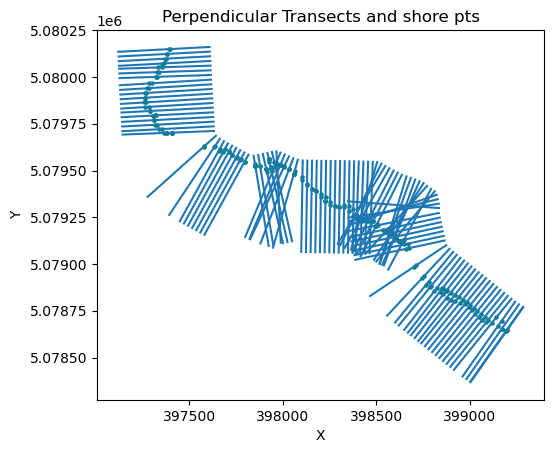

In [34]:
# import files into dataframes and inspect them

# import shore pts files into dataframes and inspect them
import geopandas as gpd
import pandas as pd
from dbfread import DBF

# Paths to the files
# shore_pts_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.dbf"
# # shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-11 17_57_07.371334 shorepts\shore_pts.shp"
# shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\NB_Lidar\AMBUR_capture\2024-09-11 15_33_33.19299 shorepts\shore_pts.shp"
shore_pts_path_dbf = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-18 10_08_08.448052 shorepts\shore_pts.shp"
shore_pts_path_shp = r"C:\Users\S1495478\Documents\RBR\NRC\Delft3d\AMBUR_capture\2024-09-18 10_08_08.448052 shorepts\shore_pts.dbf"
# Read the shapefile into a GeoDataFrame
try:
    shore_pts_gdf = gpd.read_file(shore_pts_path_shp)
    print("Shapefile loaded successfully:")
    # print(shore_pts_gdf.head())
except Exception as e:
    print(f"Error reading shapefile: {e}")

# Read the .dbf file into a DataFrame
try:
    shore_pts_dbf = pd.DataFrame(iter(DBF(shore_pts_path_dbf)))
    print("DBF file loaded successfully:")
    # print(shore_pts_dbf.head())
except Exception as e:
    print(f"Error reading DBF file: {e}")

# Read the shapefile into a GeoDataFrame
try:
    perp_transects_gdf = gpd.read_file(perp_transects_path_shp)
    print("Shapefile loaded successfully:")
    print(perp_transects_gdf.head())
except Exception as e:
    print(f"Error reading shapefile: {e}")

# Read the DBF file into a DataFrame
try:
    perp_transects_dbf = pd.DataFrame(iter(DBF(perp_transects_path_dbf)))
    print("DBF file loaded successfully:")
    print(perp_transects_dbf.head())
except Exception as e:
    print(f"Error reading DBF file: {e}")

# Plotting the shapefile data
try:
    perp_transects_gdf.plot()
    plt.title('Perpendicular Transects and shore pts')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.scatter(shore_pts_gdf['POINT_X'], shore_pts_gdf['POINT_Y'], c='teal', s=5)
    # plt.colorbar()
    plt.show()

    plt.show()
except Exception as e:
    print(f"Error plotting shapefile: {e}")




In [260]:
import geopandas as gpd

# Assuming shore_pts_gdf is your GeoDataFrame and 'transID' is the column you're working with
def keep_first_and_last(df):
    # Group by 'transID' and apply a filter
    def filter_first_last(group):
        # If there are more than 2 entries, return only the first and last rows
        if len(group) > 2:
            return group.iloc[[0, -1]]
        return group  # Otherwise, return the entire group
    
    # Apply the filter to the DataFrame
    filtered_gdf = df.groupby('transID').apply(filter_first_last).reset_index(drop=True)
    
    return filtered_gdf

# Apply the function to shore_pts_gdf
filtered_shore_pts_gdf = keep_first_and_last(shore_pts_gdf)

filtered_shore_pts_gdf = filtered_shore_pts_gdf.sort_values(by='Transect')
filtered_shore_pts_gdf = filtered_shore_pts_gdf.reset_index(drop=True)

# Display the result
print(len(filtered_shore_pts_gdf))

# plt.hist(len(filtered_shore_pts_gdf), filtered_shore_pts_gdf['transID'], 103)

206


C:\Users\S1495478\AppData\Local\Temp\ipykernel_10080\1282891141.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  filtered_gdf = df.groupby('transID').apply(filter_first_last).reset_index(drop=True)


In [262]:
import geopandas as gpd
import rasterio
import numpy as np
from shapely.geometry import Polygon
from rasterio.mask import mask



marsh_platform_mean = []
marsh_platform_std = []

# Step 1: Create a polygon from six XY points
for i in range(len(perp_transects_gdf)-1):
    
    # if i==0: points=[((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), ((filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]))]  # Replace with your actual points
    # if i>0 and i<len(perp_transects_gdf)-2: points = [(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), ((filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]))]  # Replace with your actual points
    # if i==len(perp_transects_gdf)-1: points=[(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2])]  # Replace with your actual points

    if i==0: points=[((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), (filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]), ((filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]))]  # Replace with your actual points
    if i>0 and i<len(perp_transects_gdf)-2: points = [(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), (filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]), ((filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2]))]  # Replace with your actual points
    if i==len(perp_transects_gdf)-1: points=[(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i-0)*2], filtered_shore_pts_gdf['POINT_Y'][(i-0)*2]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2])]  # Replace with your actual points


    # print(i)
    polygon = Polygon(points)
    
    
    # Create a GeoDataFrame to hold the polygon
    # gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])
    gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:32620", geometry=[polygon])
    
    # Step 2: Open the raster and mask it with the polygon
    raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"  # Replace with the actual path to your raster
    
    # Open the raster
    with rasterio.open(raster_path) as src:
        # Mask the raster using the polygon
        out_image, out_transform = mask(src, gdf.geometry, crop=True)
        out_image = out_image[0]  # Extract the first band, assuming it's single-band raster
    
        # Step 3: Calculate statistics for the masked raster
        # Mask out no-data values
        out_image = np.ma.masked_equal(out_image, src.nodata)
        
        # Calculate statistics
        raster_min = out_image.min()
        raster_max = out_image.max()
        raster_mean = out_image.mean()
        raster_std = out_image.std()
        
        marsh_platform_mean.append(raster_mean)
        marsh_platform_std.append(raster_std)
        
    of = pd.DataFrame({
        'platform elevation': marsh_platform_mean,
        'platform std': marsh_platform_std,
    })

    output_path = 'Marsh_statistics.csv'
    of.to_csv(output_path, index=True)

In [304]:
print((filtered_shore_pts_gdf['POINT_X'][205]))
len(perp_transects_gdf)-1

399200.06235357


103

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(3.5, 3))

# Path to your file
file_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"

# Open the GeoTIFF file
with rasterio.open(file_path) as src:
    # Read the data from the first band
    data = src.read(1)
    
    # Masking out invalid data values, assuming values like np.nan or very high/low numbers indicate no data
    data = np.ma.masked_where(data <= -1e10, data)  # You can change the threshold based on your data
    
    # Calculate the extent manually
    extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

raster_image = ax.imshow(data, cmap='terrain', extent=extent)
plt.colorbar(raster_image, ax=ax, label='Elevation (m)', shrink=1)
# perp_transects_gdf.plot()  

marsh_platform_mean = []
marsh_platform_std = []

# Step 1: Create a polygon from six XY points
for i in range(0, len(perp_transects_gdf)-1):
    
    # if i==0: points=[((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), ((filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]))]  # Replace with your actual points
    # if i>0 and i<len(perp_transects_gdf)-2: points = [(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2]), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), ((filtered_shore_pts_gdf['POINT_X'][(i+1)*2], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2]))]  # Replace with your actual points
    # if i==len(perp_transects_gdf)-1: points=[(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2])]  # Replace with your actual points

    if i==0: points=[((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), (filtered_shore_pts_gdf['POINT_X'][(i+1)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2+1]), ((filtered_shore_pts_gdf['POINT_X'][(i+0)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2+1]))]  # Replace with your actual points
    if i>0 and i<len(perp_transects_gdf)-2: points = [(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), ((perp_transects_gdf['StartX'][i+1], perp_transects_gdf['StartY'][i+1])), (filtered_shore_pts_gdf['POINT_X'][(i+1)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i+1)*2+1]), (filtered_shore_pts_gdf['POINT_X'][(i+0)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i+0)*2+1]), ((filtered_shore_pts_gdf['POINT_X'][(i-1)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2+1]))]  # Replace with your actual points
    if i==len(perp_transects_gdf)-1: points=[(perp_transects_gdf['StartX'][i-1], perp_transects_gdf['StartY'][i-1]), ((perp_transects_gdf['StartX'][i+0], perp_transects_gdf['StartY'][i+0])), (filtered_shore_pts_gdf['POINT_X'][(i-0)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i-0)*2+1]), (filtered_shore_pts_gdf['POINT_X'][(i-1)*2+1], filtered_shore_pts_gdf['POINT_Y'][(i-1)*2+1])]  # Replace with your actual points

    # print(i)
    polygon = Polygon(points)
    
    # Create a GeoDataFrame to hold the polygon
    # gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[polygon])
    gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:32620", geometry=[polygon])
    
    # Step 2: Open the raster and mask it with the polygon
    raster_path = r"C:\Users\S1495478\Documents\ArcGIS\Projects\20240904_AUL\c20210801_Aulac_Lidar_D_C.tif"  # Replace with the actual path to your raster
    
    # Open the raster
    with rasterio.open(raster_path) as src:
        # Mask the raster using the polygon
        out_image, out_transform = mask(src, gdf.geometry, crop=True)
        out_image = out_image[0]  # Extract the first band, assuming it's single-band raster
    
        # Step 3: Calculate statistics for the masked raster
        # Mask out no-data values
        out_image = np.ma.masked_equal(out_image, src.nodata)
        
        # Calculate statistics
        raster_min = out_image.min()
        raster_max = out_image.max()
        raster_mean = out_image.mean()
        raster_std = out_image.std()
        
        marsh_platform_mean.append(raster_mean)
        marsh_platform_std.append(raster_std)

        # Plot the polygon
        gdf.boundary.plot(ax=ax, color='red', linewidth=1, label='Polygon')

# plt.title("")
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees

# of = pd.DataFrame({
#     'platform elevation': marsh_platform_mean,
#     'platform std': marsh_platform_std,
# })

# output_path = r'C:\Users\S1495478\Documents\RBR\NRC\Figures\MarshTransects.csv'
# of.to_csv(output_path, index=True)

# plt.legend()

# # # Set x and y axis limits based on raster bounds or manually
# plt.xlim(src.bounds.left, src.bounds.right)  # Modify as needed for custom limits
# plt.ylim(src.bounds.bottom +550, src.bounds.top)  # Modify as needed for custom limits

# output_path = r"C:\Users\S1495478\Documents\RBR\NRC\Figures\Imagery_MarshTransects.jpeg"
# plt.savefig(output_path, dpi=300)  # Save as PNG with 300 DPI
# plt.close()
            
# # # Show the plot
# plt.show()

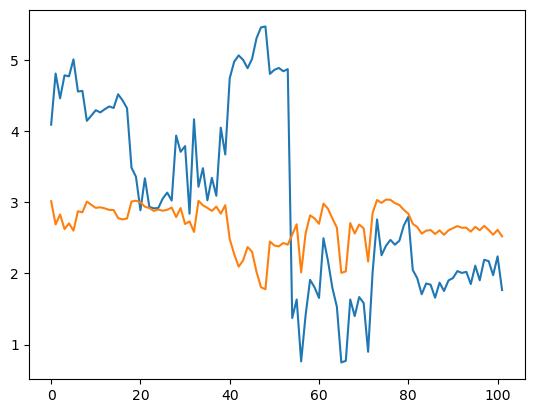

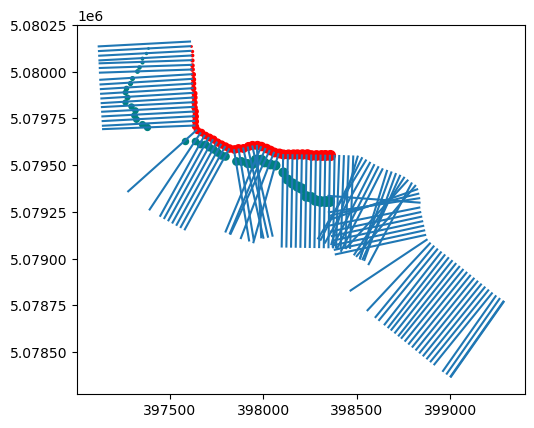

In [268]:
print(len(marsh_platform_mean), len(marsh_platform_std))

plt.plot(marsh_platform_mean)
plt.plot(marsh_platform_std)

perp_transects_gdf.plot()

filtered_shore_pts_gdf = filtered_shore_pts_gdf.sort_values(by='Transect')
filtered_shore_pts_gdf = filtered_shore_pts_gdf.reset_index(drop=True)


for i in range(0,103):#len(perp_transects_gdf)-1):
    plt.scatter(filtered_shore_pts_gdf['POINT_X'][i*2+1], filtered_shore_pts_gdf['POINT_Y'][i*2+1], c='teal', s=round(i))

    plt.scatter(perp_transects_gdf['StartX'][i], perp_transects_gdf['StartY'][i], c='red', s=round(i))

